Import Data

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\preprocessed_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X_train = data_fetcher.get_X()
y_train = data_fetcher.get_y()


------class run complete------



Feature Scaling

In [2]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_clf = KNeighborsClassifier(n_neighbors= 9, p = 2, algorithm='ball_tree', leaf_size=30,weights='uniform')

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------KNN Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------KNN Metrics----------

Accuracy: 0.9180327868852459
Precision: 0.9090909090909091
Recall: 0.9375
F1 Score: 0.923076923076923

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Confusion Matrix

[[26  3]
 [ 2 30]]


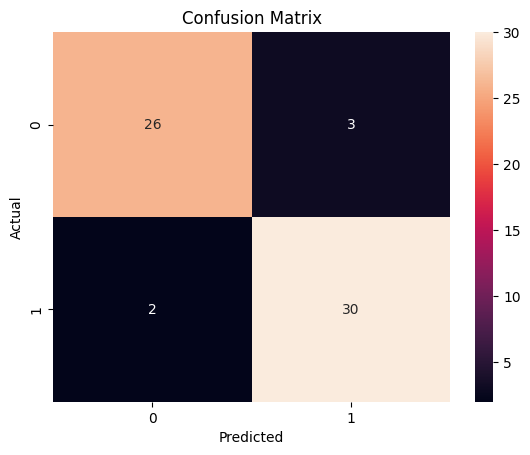

In [4]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Grid Search

In [5]:
#perform grid search for different neighbors
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'n_neighbors': np.arange(1, 20), 'p': [2],'n_jobs': [-1], 'algorithm': ['ball_tree'], 'leaf_size': [2,3,5,15,16,18,20]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
knn_cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 15, 'p': 2}
Best score is 0.8243010752688174


Cross Validation

In [6]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("Mean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold

Fold 0 : 0.8709677419354839
Fold 1 : 0.7741935483870968
Fold 2 : 0.8333333333333334
Fold 3 : 0.8666666666666667
Fold 4 : 0.9
Fold 5 : 0.7333333333333333
Fold 6 : 0.8666666666666667
Fold 7 : 0.8
Fold 8 : 0.6666666666666666
Fold 9 : 0.8333333333333334
Mean: 0.814516129032258
Standard Deviation: 0.06850441347299623
